In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
# load datasets
df = pd.read_csv('/content/drive/MyDrive/Belajar/DataScience/Day 24/churn.csv')

# Preliminary Look

In [ ]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7046, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


## Statistical Summary

In [ ]:
# Group numeric columns
numericals = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
numericals


['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# Group categoric columns
categoricals = df.loc[:, (df.dtypes != int) & (df.dtypes != float)].columns.tolist()
categoricals


['customerID',
 'Gender',
 'Partner',
 'Dependents',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7034.000000,7029.000000,7036.000000,7046.000000
mean,0.162354,32.412150,64.800391,2281.921636
std,0.368802,24.546806,30.070620,2265.653438
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,401.350000
50%,0.000000,29.000000,70.350000,1397.100000
75%,0.000000,55.000000,89.850000,3791.000000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df[categoricals].describe()

,customerID,Gender,Partner,Dependents,Contract,PaperlessBilling,PaymentMethod,Churn
count,7037,7030,7030,7027,7033,7033,7035,7046
unique,7023,2,2,2,3,2,4,2
top,6000-UKLWI,Male,No,No,Month-to-month,Yes,Electronic check,No
freq,2,3552,3638,4931,3873,4168,2367,5174


## Detect Outliers

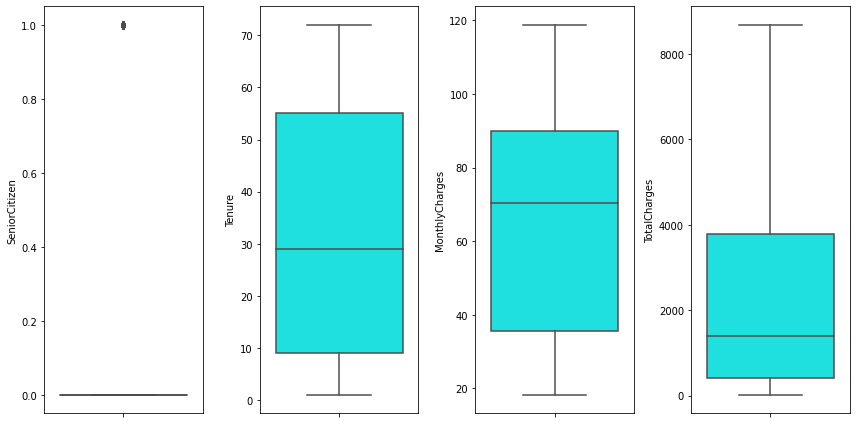

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

No outlier

## Distribution Form

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

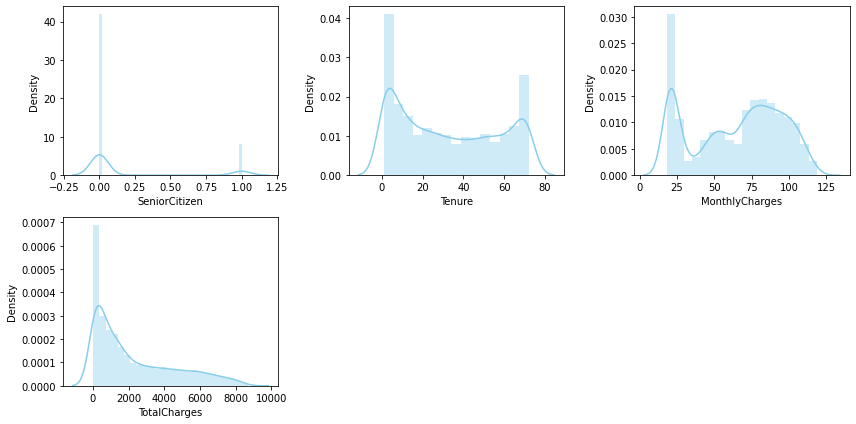

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

**Observation:**

1. Data contains 12 columns with 7046 rows.
2. Most columns have missing values.
3. Data has no outlier.
4. No obvious defect on the data (column name vs its entries), all looks good.
5. The target column `churn` data is imbalance. But, the imbalance condition is NOT severe (still OK).


# Data Cleansing

## Missing Values

In [ ]:
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage
0,Dependents,19,0.27
1,Tenure,17,0.24
2,Gender,16,0.23
3,Partner,16,0.23
4,Contract,13,0.18
5,PaperlessBilling,13,0.18
6,SeniorCitizen,12,0.17
7,PaymentMethod,11,0.16
8,MonthlyCharges,10,0.14
9,customerID,9,0.13


Because the number of rows with missing values are small in proportion, we will drop them

In [ ]:
# drop missing value
df = df.dropna()

In [ ]:
# check missing values
df.isna().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Duplicated Values

In [ ]:
df.duplicated().sum()

13

In [ ]:
# duplicated rows
df[df.duplicated(keep=False)].sort_values('customerID').head(14)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7039,2236-HILPA,Male,0.0,Yes,Yes,62.0,Two year,No,Credit card (automatic),20.65,1218.45,No
5915,2236-HILPA,Male,0.0,Yes,Yes,62.0,Two year,No,Credit card (automatic),20.65,1218.45,No
6567,2342-CKIAO,Female,0.0,No,No,2.0,Month-to-month,No,Mailed check,20.30,41.20,No
7040,2342-CKIAO,Female,0.0,No,No,2.0,Month-to-month,No,Mailed check,20.30,41.20,No
7032,2905-KFQUV,Female,0.0,Yes,No,2.0,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No
5835,2905-KFQUV,Female,0.0,Yes,No,2.0,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No
3478,2921-XWDJH,Female,1.0,Yes,No,38.0,Month-to-month,Yes,Electronic check,83.45,3147.15,No
7044,2921-XWDJH,Female,1.0,Yes,No,38.0,Month-to-month,Yes,Electronic check,83.45,3147.15,No
7045,3604-WLABM,Female,0.0,No,No,10.0,Month-to-month,No,Electronic check,54.25,583.00,No
3652,3604-WLABM,Female,0.0,No,No,10.0,Month-to-month,No,Electronic check,54.25,583.00,No


In [ ]:
# drop duplicated rows
df = df.drop_duplicates()

In [ ]:
# sanity check
df.duplicated().sum()

0

# Data Encoding

In [ ]:
# drop column customerID
df = df.drop('customerID', axis=1)

In [ ]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [ ]:
# copy df for encoding
data = df.copy()

In [ ]:
# Group categoric columns
categoricals = data.loc[:, (df.dtypes != int) & (data.dtypes != float)].columns.tolist()
categoricals

['Gender',
 'Partner',
 'Dependents',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of Gender column
Male      3488
Female    3410
Name: Gender, dtype: int64 

Value counts of Partner column
No     3573
Yes    3325
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4845
Yes    2053
Name: Dependents, dtype: int64 

Value counts of Contract column
Month-to-month    3803
Two year          1653
One year          1442
Name: Contract, dtype: int64 

Value counts of PaperlessBilling column
Yes    4088
No     2810
Name: PaperlessBilling, dtype: int64 

Value counts of PaymentMethod column
Electronic check             2309
Mailed check                 1581
Bank transfer (automatic)    1514
Credit card (automatic)      1494
Name: PaymentMethod, dtype: int64 

Value counts of Churn column
No     5073
Yes    1825
Name: Churn, dtype: int64 



Observation:
* Columns with 2 distinct values: `Gender`, `Partner`, `Dependents`, `PaperlessBilling`, `Churn` will be converted to binary numeric (0,1)
* Columns with 3 or more values: `Contract`, `PaymentMethod` will be converted using one hot encoding




## Binary Numeric

In [ ]:
# encode column Gender
map_gender = {'Female':1, 'Male':0}
data['Gender'] = data['Gender'].map(map_gender)

In [ ]:
# encode column Partner
map_partner = {'Yes':1, 'No':0}
data['Partner'] = data['Partner'].map(map_partner)

In [ ]:
# encode column Dependents
map_Dependents = {'Yes':1, 'No':0}
data['Dependents'] = data['Dependents'].map(map_Dependents)

In [ ]:
# encode column PaperlessBilling
map_PaperlessBilling = {'Yes':1, 'No':0}
data['PaperlessBilling'] = data['PaperlessBilling'].map(map_PaperlessBilling)

In [ ]:
# encode column Churn 
map_Churn = {'Yes':1, 'No':0}
data['Churn'] = data['Churn'].map(map_Churn)

In [ ]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [ ]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,0,0.0,0,0,34.0,One year,0,Mailed check,56.95,1889.50,0
2,0,0.0,0,0,2.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0.0,0,0,45.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0.0,0,0,2.0,Month-to-month,1,Electronic check,70.70,151.65,1
5,1,0.0,0,0,8.0,Month-to-month,1,Electronic check,99.65,820.50,1


## One Hot Encoding

In [ ]:
# encode column contract
dummies_contract = pd.get_dummies(data['Contract'],prefix='contract', drop_first=True)
data = pd.concat([data, dummies_contract], axis=1)

In [ ]:
# encode column paymentmethod
dummies_payment = pd.get_dummies(data['PaymentMethod'],prefix='payment', drop_first=True)
data = pd.concat([data, dummies_payment], axis=1)

In [ ]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,contract_One year,contract_Two year,payment_Credit card (automatic),payment_Electronic check,payment_Mailed check
1,0,0.0,0,0,34.0,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,1
2,0,0.0,0,0,2.0,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,1
3,0,0.0,0,0,45.0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0
4,1,0.0,0,0,2.0,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0
5,1,0.0,0,0,8.0,Month-to-month,1,Electronic check,99.65,820.50,1,0,0,0,1,0


In [ ]:
# drop column Contract and PaymentMethod because we have encoded the columns
data = data.drop(columns=['Contract', 'PaymentMethod'])

In [ ]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,contract_One year,contract_Two year,payment_Credit card (automatic),payment_Electronic check,payment_Mailed check
1,0,0.0,0,0,34.0,0,56.95,1889.50,0,1,0,0,0,1
2,0,0.0,0,0,2.0,1,53.85,108.15,1,0,0,0,0,1
3,0,0.0,0,0,45.0,0,42.30,1840.75,0,1,0,0,0,0
4,1,0.0,0,0,2.0,1,70.70,151.65,1,0,0,0,1,0
5,1,0.0,0,0,8.0,1,99.65,820.50,1,0,0,0,1,0


# Multicollinearity Study

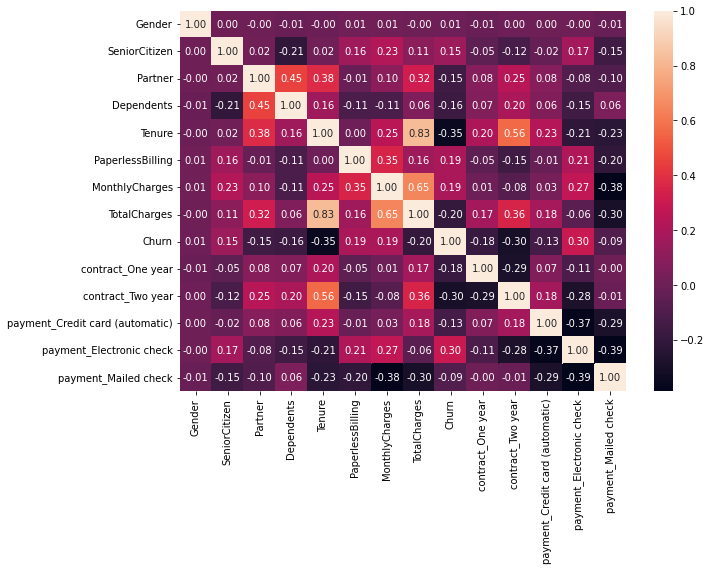

In [ ]:
# heatmap correlation
# data_train = pd.concat([X_train, y_train], axis=1)
corr = data.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

`Tenure` and `TotalCharges` have high correlation, so we will drop one of them. Because `Tenure` and `Churn` correlation score is higher, then we will keep `Tenure` and drop `TotalCharges`

In [ ]:
# drop redundant features
data = data.drop(columns=['TotalCharges'])

# Split the Data

In [ ]:
# Split train and test data
from sklearn.model_selection import train_test_split

X = data.drop(columns='Churn')
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Split train and test data 80:20
from sklearn.model_selection import train_test_split

X = data.drop(columns='Churn').to_numpy()
y = data[['Churn']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Modelling

## Choose Appropriate Metric

Since customer churn is a classification case, I will use **Random Forest** and **KNN** to model the data. Data in target column `Churn` is imbalance, so I will not use accuracy as the scoring parameter. In this case I will use **recall** as the scoring parameter since the objective is to correctly predict as many churner as possible.

In [ ]:
data['Churn'].value_counts()

0    5073
1    1825
Name: Churn, dtype: int64

## Random Forest

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 10.6 s, sys: 0 ns, total: 10.6 s
Wall time: 10.6 s


In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.413240,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.383275,2
23,"{'max_depth': 5, 'n_estimators': 40}",0.382578,3
22,"{'max_depth': 5, 'n_estimators': 30}",0.381185,4
15,"{'max_depth': 4, 'n_estimators': 10}",0.371429,5
24,"{'max_depth': 5, 'n_estimators': 50}",0.370732,6
16,"{'max_depth': 4, 'n_estimators': 20}",0.334495,7
18,"{'max_depth': 4, 'n_estimators': 40}",0.316376,8
17,"{'max_depth': 4, 'n_estimators': 30}",0.312892,9
10,"{'max_depth': 3, 'n_estimators': 10}",0.312892,10


**Result in hyperparameter tuning**

max_depth: 5, n_estimators: 10	


### Model Evaluation

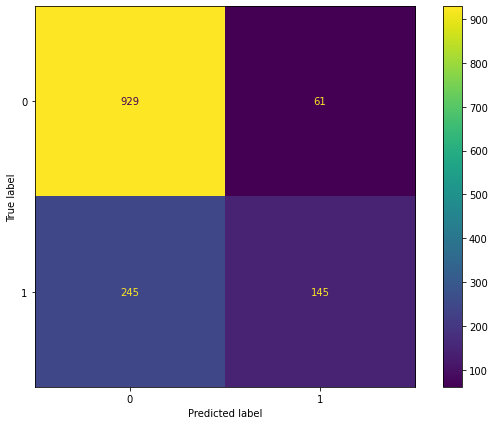

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       990
           1       0.70      0.37      0.49       390

    accuracy                           0.78      1380
   macro avg       0.75      0.66      0.67      1380
weighted avg       0.77      0.78      0.75      1380



Recall score for random forest model is 37%. The performance of this model is still not good enough (underfit)

## KNN

In [ ]:
# split the data 
from sklearn.model_selection import train_test_split

X = data.drop(columns='Churn').to_numpy()
y = data[['Churn']].to_numpy()
y = y.reshape(len(y),) # sklean formatting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,{'n_neighbors': 3},0.510105,1
3,{'n_neighbors': 5},0.497561,2
5,{'n_neighbors': 7},0.494077,3
6,{'n_neighbors': 8},0.419512,4
4,{'n_neighbors': 6},0.410453,5
2,{'n_neighbors': 4},0.370035,6
0,{'n_neighbors': 2},0.312195,7


**Result in hyperparameter tuning**

n_neighbors: 3

### Model Evaluation

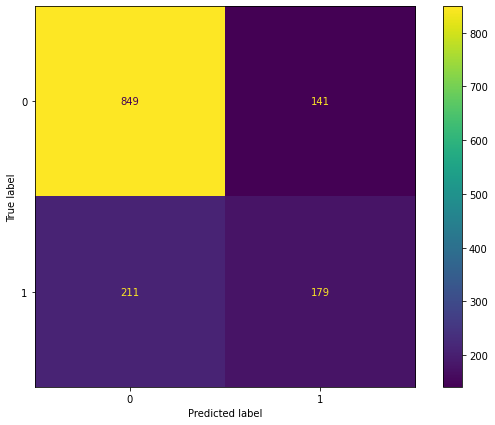

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       990
           1       0.56      0.46      0.50       390

    accuracy                           0.74      1380
   macro avg       0.68      0.66      0.67      1380
weighted avg       0.73      0.74      0.74      1380



Recall score for KNN model is 46%, slightly better than random forest (37%). But the performance of this model is still not good enough (underfit).


Because neither random forest nor KNN model has good performance, we will try to do another method, that is oversampling. We will oversample using SMOTE before training the model, so data in target column (`Churn`) is balance.

## Random Forest (oversampling)

In [ ]:
# Split train and test data 80:20
from sklearn.model_selection import train_test_split

X = data.drop(columns='Churn').to_numpy()
y = data[['Churn']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Oversampling using SMOTE

In [ ]:
# oversampling data using SMOTE
from imblearn import under_sampling, over_sampling

X_train, y_train = over_sampling.SMOTE().fit_resample(X_train, y_train)

### Train Data

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 14.7 s, sys: 1.12 ms, total: 14.7 s
Wall time: 14.8 s


In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'max_depth': 1, 'n_estimators': 20}",0.845946,1
20,"{'max_depth': 5, 'n_estimators': 10}",0.845217,2
10,"{'max_depth': 3, 'n_estimators': 10}",0.844968,3
23,"{'max_depth': 5, 'n_estimators': 40}",0.842273,4
12,"{'max_depth': 3, 'n_estimators': 30}",0.840561,5
21,"{'max_depth': 5, 'n_estimators': 20}",0.839827,6
22,"{'max_depth': 5, 'n_estimators': 30}",0.837373,7
16,"{'max_depth': 4, 'n_estimators': 20}",0.836639,8
5,"{'max_depth': 2, 'n_estimators': 10}",0.836149,9
11,"{'max_depth': 3, 'n_estimators': 20}",0.835906,10


**Result in hyperparameter tuning**

max_depth: 1, n_estimators: 20


### Model Evaluation

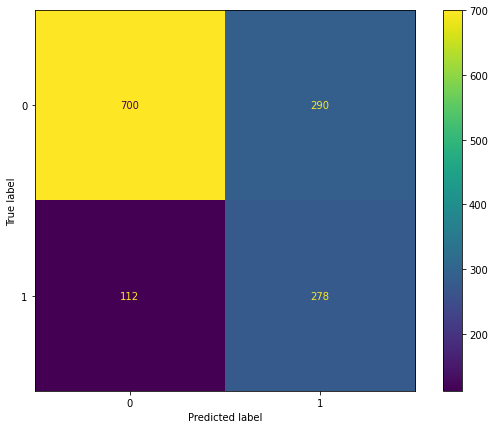

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       990
           1       0.49      0.71      0.58       390

    accuracy                           0.71      1380
   macro avg       0.68      0.71      0.68      1380
weighted avg       0.76      0.71      0.72      1380



After oversampling, model performance (recall score) drastically increased to 71%

## KNN (oversampling)

In [ ]:
# split the data 
from sklearn.model_selection import train_test_split

X = data.drop(columns='Churn').to_numpy()
y = data[['Churn']].to_numpy()
y = y.reshape(len(y),) # sklean formatting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Oversampling using SMOTE

In [ ]:
# oversampling data using SMOTE
from imblearn import under_sampling, over_sampling

X_train, y_train = over_sampling.SMOTE().fit_resample(X_train, y_train)

### Train Data

In [ ]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,{'n_neighbors': 3},0.929460,1
3,{'n_neighbors': 5},0.910844,2
5,{'n_neighbors': 7},0.892724,3
2,{'n_neighbors': 4},0.862352,4
4,{'n_neighbors': 6},0.851575,5
6,{'n_neighbors': 8},0.847167,6
0,{'n_neighbors': 2},0.844717,7


**Result in hyperparameter tuning**

n_neighbors: 3

### Model Evaluation

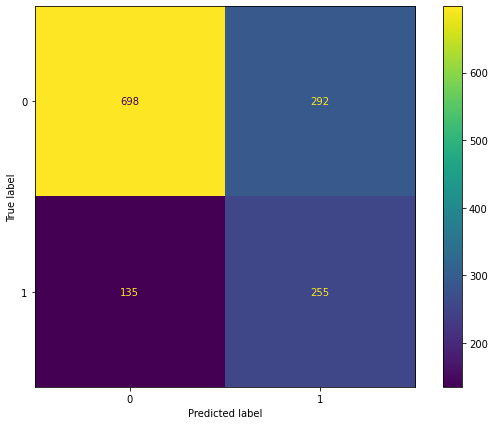

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       990
           1       0.47      0.65      0.54       390

    accuracy                           0.69      1380
   macro avg       0.65      0.68      0.66      1380
weighted avg       0.73      0.69      0.70      1380



After oversampling, model performance also increased to 65%, but the score is lower than Random Forest Model (oversampling)

**Classification Report Summary**

Random Forest 
```
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       990
           1       0.70      0.37      0.49       390

    accuracy                           0.78      1380
   macro avg       0.75      0.66      0.67      1380
weighted avg       0.77      0.78      0.75      1380

```


KNN
```
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       990
           1       0.56      0.46      0.50       390

    accuracy                           0.74      1380
   macro avg       0.68      0.66      0.67      1380
weighted avg       0.73      0.74      0.74      1380
```

Random Forest SMOTE
```
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       990
           1       0.49      0.71      0.58       390

    accuracy                           0.71      1380
   macro avg       0.68      0.71      0.68      1380
weighted avg       0.76      0.71      0.72      1380
```

KNN SMOTE
```
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       990
           1       0.47      0.65      0.54       390

    accuracy                           0.69      1380
   macro avg       0.65      0.68      0.66      1380
weighted avg       0.73      0.69      0.70      1380
```

# Conclusion

After developed some models and compare the evaluation score, we can conclude that modelling with Random Forest (oversampling SMOTE) has the best performance.